In [78]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [10]:
from io import BytesIO

In [111]:
df = pd.read_csv('opendata.csv', encoding='cp949')

In [112]:
df = df.dropna(how='all')

In [113]:
df = df.replace("-", np.nan)

In [114]:
df = df.fillna(0)

In [101]:
df1 = df1.iloc[:,1:].astype(str).astype(float)

In [102]:
df1.corr()

,so2,co,o3,no2,pm10,pm25,기온(°C),강수량(mm),습도(%)
so2,1.000000,0.545235,0.361827,0.380433,0.615578,0.651750,0.388246,-0.225544,-0.347483
co,0.545235,1.000000,-0.061766,0.681965,0.756757,0.788252,0.124012,-0.227053,-0.204934
o3,0.361827,-0.061766,1.000000,-0.392495,0.288034,0.205357,0.346114,-0.104107,-0.317161
no2,0.380433,0.681965,-0.392495,1.000000,0.473720,0.522171,0.086677,-0.169519,-0.211037
pm10,0.615578,0.756757,0.288034,0.473720,1.000000,0.898539,0.314840,-0.254871,-0.376911
pm25,0.651750,0.788252,0.205357,0.522171,0.898539,1.000000,0.360002,-0.201181,-0.257182
기온(°C),0.388246,0.124012,0.346114,0.086677,0.314840,0.360002,1.000000,-0.022829,-0.494382
강수량(mm),-0.225544,-0.227053,-0.104107,-0.169519,-0.254871,-0.201181,-0.022829,1.000000,0.401968
습도(%),-0.347483,-0.204934,-0.317161,-0.211037,-0.376911,-0.257182,-0.494382,0.401968,1.000000


In [103]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [115]:
data = df[['날짜','pm10']]

In [126]:
data = data['pm10'].astype(str).astype(float)

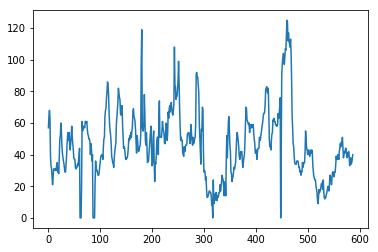

In [127]:
data.plot()

In [119]:
from statsmodels.tsa.arima_model import ARIMA

In [130]:
model = ARIMA(data, order=(0,1,1))
model_fit = model.fit(trend='c', full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.pm10   No. Observations:                  587
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2109.593
Method:                       css-mle   S.D. of innovations              8.801
Date:                Fri, 31 May 2019   AIC                           4225.186
Time:                        01:55:41   BIC                           4238.311
Sample:                             1   HQIC                          4230.301
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0277      0.392     -0.071      0.944      -0.796       0.741
ma.L1.D.pm10     0.0796      0.048      1.649      0.100      -0.015       0.174
                                    Roots   

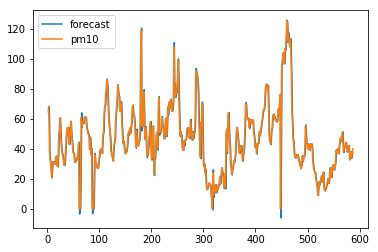

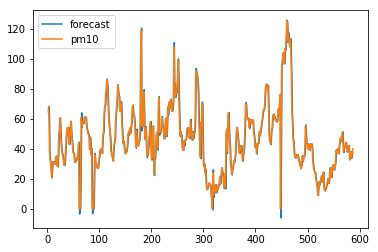

In [131]:
model_fit.plot_predict()

In [134]:
fore = model_fit.forecast(steps=1)
print(fore)

(array([40.20124173]), array([8.80140595]), array([[22.95080304, 57.45168041]]))


In [ ]:
#예측값 40이라는 뜻